# Implementation of Artificial Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simplePreprocessor import SimplePreprocessor
from deepNN import DNN
from utils import SAVE

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200

In [2]:
df = pd.read_csv('dataset_NN.csv').sample(frac=1, random_state=42)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
df.head()

,att1,att2,att3,att4,att5,att6,class
1860,1.0,1.0,1.0,134.796861,1.340223,3433.305405,10
353,0.0,3.0,1.0,145.266861,1.460744,4527.256946,2
1333,1.0,1.0,1.0,135.524861,1.434779,3419.240362,7
905,0.0,2.0,0.0,157.226861,1.816765,7665.670985,5
1289,1.0,1.0,1.0,133.358861,1.370034,3378.034885,7


In [3]:
preprocessor = SimplePreprocessor()

In [4]:
X.head()

,att1,att2,att3,att4,att5,att6
1860,1.0,1.0,1.0,134.796861,1.340223,3433.305405
353,0.0,3.0,1.0,145.266861,1.460744,4527.256946
1333,1.0,1.0,1.0,135.524861,1.434779,3419.240362
905,0.0,2.0,0.0,157.226861,1.816765,7665.670985
1289,1.0,1.0,1.0,133.358861,1.370034,3378.034885


In [5]:
X = X.to_numpy()
y = y.to_numpy()

In [6]:
y = preprocessor.OneHot(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [7]:
y.shape, X.shape

((10, 2000), (2000, 6))

In [8]:
X_train, X_test, y_train, y_test = preprocessor.train_test_split(X.T, y)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6, 1400), (6, 600), (10, 1400), (10, 600))

In [16]:
ARCHITECTURE_1 = {
    'layer_dims' : [X_train.shape[0], 64, 16, y_train.shape[0]],
    'lRate' : 0.009,
    'epochs' : 300,
    'activation' : 'ReLu',
    'initializer' : 'He',
    'GD_type' : 'StochasticGD',
    'batch_size' : None,
    'optimizer' : 'Momentum',
    'momentum' : 0.9,
}
MODEL1 = DNN(ARCHITECTURE_1['layer_dims'], lRate=ARCHITECTURE_1['lRate'], epochs=ARCHITECTURE_1['epochs'],
activation=ARCHITECTURE_1['activation'], initializer=ARCHITECTURE_1['initializer'],
GD_type=ARCHITECTURE_1['GD_type'], batch_size=ARCHITECTURE_1['batch_size'],
optimizer=ARCHITECTURE_1['optimizer'], momentum=ARCHITECTURE_1['momentum'])


costs1 = MODEL1.fit(X_train, y_train, print_cost=True)
train_acc = MODEL1.accuracy(X_train, y_train)
test_acc = MODEL1.accuracy(X_test, y_test)
SAVE(ARCHITECTURE_1, train_acc, test_acc)
print(f'Train Acc : {train_acc}')
print(f'Test Acc : {test_acc}')

('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (16, 64)', 'b shape : (16, 1)')
('Layer 3 W shape : (10, 16)', 'b shape : (10, 1)')
Cost after iteration0: 0.001105433993737106
Cost after iteration50: 0.00047141996809666836
Cost after iteration100: 0.0004428661353027713
Cost after iteration150: 0.00044680869434661697
Cost after iteration200: 0.0004492164193867646
Cost after iteration250: 0.0004516393901215958
Train Acc : 0.7478571428571429
Test Acc : 0.6766666666666666


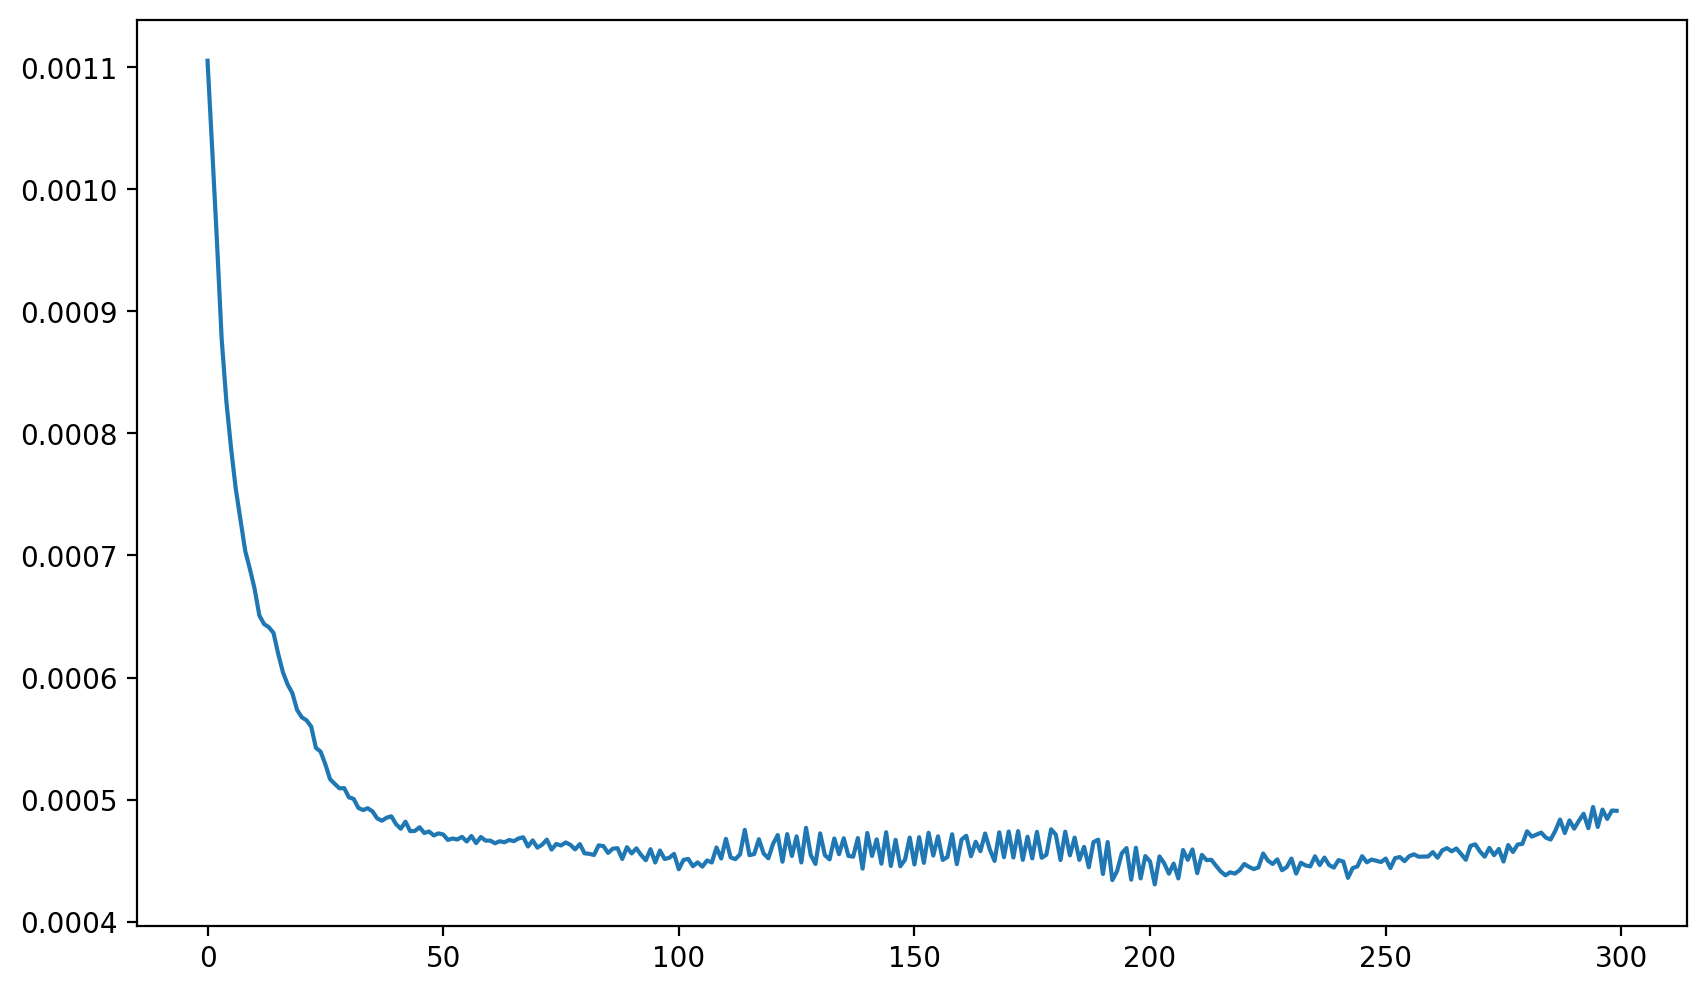

In [17]:
plt.plot(np.squeeze(costs1))
plt.show()